In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### **데이터 불러오기 및 병합**

In [ ]:
file1 = '/content/drive/MyDrive/한이음_수요예측/Data/1. 이커머스 FC주문 데이터/1-1. 이커머스 FC주문 데이터_3월.csv'
file2 = '/content/drive/MyDrive/한이음_수요예측/Data/1. 이커머스 FC주문 데이터/1-2. 이커머스 FC주문 데이터_4월.csv'
file3 = '/content/drive/MyDrive/한이음_수요예측/Data/1. 이커머스 FC주문 데이터/1-3. 이커머스 FC주문 데이터_5월.csv'
file4 = '/content/drive/MyDrive/한이음_수요예측/Data/1. 이커머스 FC주문 데이터/1-4. 이커머스 FC주문 데이터_6월.csv'

In [ ]:
FC3 = pd.read_excel(file1)
FC4 = pd.read_excel(file2)
FC5 = pd.read_excel(file3)
FC6 = pd.read_excel(file4)

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
FC = pd.concat([FC3,FC4,FC5,FC6],ignore_index=True)

In [ ]:
FC.head()

,CORP_ID,REF_ORD_NO,BKG_NO,BKG_TYP,BKG_DATE,BKG_TIME,SHPR_CD,INV_AMT,ITEM_SEQ,ITEM_CD,...,DLVSUBCLSFCD,INS_ID,INS_DATE,INS_TIME,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
0,KX007,2021030365922551,KX007210303370934,7,20210303,35510,90001302,22400.0,2.0,134265392,...,1,iNEXBatch,20210303,131425,3.0,N,세종특별자치시,NaN,서울특별시,서대문구
1,KX007,2021030365922951,KX007210303371080,7,20210303,35521,90001441,20900.0,1.0,4610261043_2,...,4,iNEXBatch,20210303,131425,50.0,N,경기도,광주시,경상남도,김해시
2,KX007,2021030365924361,KX007210303371081,7,20210303,35513,90001441,37900.0,1.0,4936599538_1,...,0,iNEXBatch,20210303,131425,53.0,N,경기도,광주시,경상남도,거제시
3,KX007,2021030365928921,KX007210303371205,7,20210303,35608,90001542,69800.0,1.0,3858391637_1,...,1,iNEXBatch,20210303,131425,6.0,N,경기도,광주시,서울특별시,서초구
4,KX007,2021030365930451,KX007210303370967,7,20210303,35551,90001341,73700.0,1.0,4631307460,...,1,iNEXBatch,20210303,131425,10.0,N,경기도,광주시,경기도,김포시


In [ ]:
FC.tail()

,CORP_ID,REF_ORD_NO,BKG_NO,BKG_TYP,BKG_DATE,BKG_TIME,SHPR_CD,INV_AMT,ITEM_SEQ,ITEM_CD,...,DLVSUBCLSFCD,INS_ID,INS_DATE,INS_TIME,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
1786369,GP001,201806270001,GP001210628546912,7,20210628,91210,90001772,NaN,16.0,00281,...,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN
1786370,GP001,201806270001,GP001210628546912,7,20210628,91210,90001772,NaN,17.0,00316,...,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN
1786371,GP001,201806270001,GP001210628546912,7,20210628,91210,90001772,NaN,18.0,00338,...,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN
1786372,GP001,201806270001,GP001210628546912,7,20210628,91210,90001772,NaN,19.0,00183,...,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN
1786373,GP001,201806270001,GP001210628546912,7,20210628,91210,90001772,NaN,20.0,8809641651310,...,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN


In [ ]:
FC.to_csv("/content/drive/MyDrive/한이음_수요예측/Data/1. 이커머스 FC주문 데이터/FC.csv")

#### **데이터 탐색**

In [3]:
# 데이터 불러오기
FC = pd.read_csv('/content/drive/MyDrive/한이음_수요예측/Data/1. 이커머스 FC주문 데이터/FC.csv',encoding='utf-8')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
FC.head()

,Unnamed: 0,CORP_ID,REF_ORD_NO,BKG_NO,BKG_TYP,BKG_DATE,BKG_TIME,SHPR_CD,INV_AMT,ITEM_SEQ,...,DLVSUBCLSFCD,INS_ID,INS_DATE,INS_TIME,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
0,0,KX007,2021030365922551,KX007210303370934,7,20210303,35510,90001302,22400.0,2.0,...,1,iNEXBatch,20210303,131425,3.0,N,세종특별자치시,NaN,서울특별시,서대문구
1,1,KX007,2021030365922951,KX007210303371080,7,20210303,35521,90001441,20900.0,1.0,...,4,iNEXBatch,20210303,131425,50.0,N,경기도,광주시,경상남도,김해시
2,2,KX007,2021030365924361,KX007210303371081,7,20210303,35513,90001441,37900.0,1.0,...,0,iNEXBatch,20210303,131425,53.0,N,경기도,광주시,경상남도,거제시
3,3,KX007,2021030365928921,KX007210303371205,7,20210303,35608,90001542,69800.0,1.0,...,1,iNEXBatch,20210303,131425,6.0,N,경기도,광주시,서울특별시,서초구
4,4,KX007,2021030365930451,KX007210303370967,7,20210303,35551,90001341,73700.0,1.0,...,1,iNEXBatch,20210303,131425,10.0,N,경기도,광주시,경기도,김포시


In [5]:
FC.tail()

,Unnamed: 0,CORP_ID,REF_ORD_NO,BKG_NO,BKG_TYP,BKG_DATE,BKG_TIME,SHPR_CD,INV_AMT,ITEM_SEQ,...,DLVSUBCLSFCD,INS_ID,INS_DATE,INS_TIME,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
1786369,1786369,GP001,201806270001,GP001210628546912,7,20210628,91210,90001772,NaN,16.0,...,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN
1786370,1786370,GP001,201806270001,GP001210628546912,7,20210628,91210,90001772,NaN,17.0,...,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN
1786371,1786371,GP001,201806270001,GP001210628546912,7,20210628,91210,90001772,NaN,18.0,...,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN
1786372,1786372,GP001,201806270001,GP001210628546912,7,20210628,91210,90001772,NaN,19.0,...,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN
1786373,1786373,GP001,201806270001,GP001210628546912,7,20210628,91210,90001772,NaN,20.0,...,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN


In [6]:
FC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1786374 entries, 0 to 1786373
Data columns (total 33 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   CORP_ID             object 
 2   REF_ORD_NO          object 
 3   BKG_NO              object 
 4   BKG_TYP             int64  
 5   BKG_DATE            int64  
 6   BKG_TIME            int64  
 7   SHPR_CD             int64  
 8   INV_AMT             float64
 9   ITEM_SEQ            float64
 10  ITEM_CD             object 
 11  BRAND_NM            object 
 12  ITEM_QTY            float64
 13  ITEM_AMT            float64
 14  IF_YN               object 
 15  ORDER_CRT_DATETIME  float64
 16  DLV_DV              float64
 17  REF_ITEM_SEQ        object 
 18  ORDER_IDX           object 
 19  ORDER_YN            object 
 20  DLVPREARRBRANCD     object 
 21  DLVPREARREMPNICKNM  object 
 22  DLVCLSFCD           object 
 23  DLVSUBCLSFCD        object 
 24  INS_ID              obje

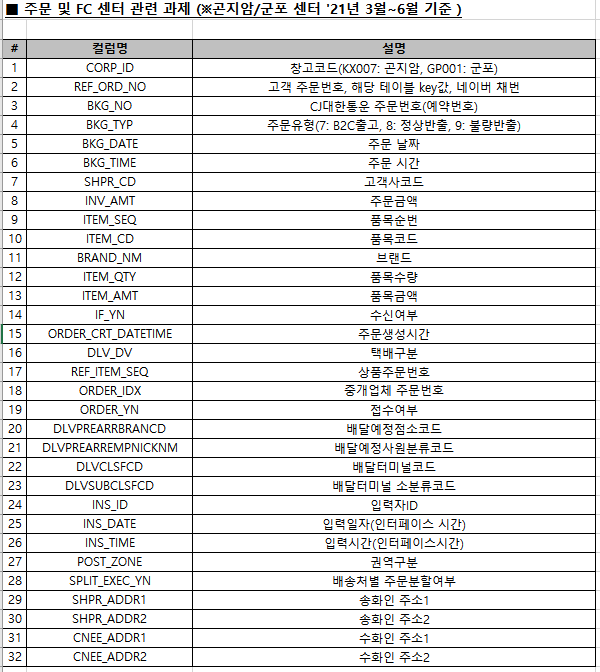

In [7]:
FC.columns

Index(['Unnamed: 0', 'CORP_ID', 'REF_ORD_NO', 'BKG_NO', 'BKG_TYP', 'BKG_DATE',
       'BKG_TIME', 'SHPR_CD', 'INV_AMT', 'ITEM_SEQ', 'ITEM_CD', 'BRAND_NM',
       'ITEM_QTY', 'ITEM_AMT', 'IF_YN', 'ORDER_CRT_DATETIME', 'DLV_DV',
       'REF_ITEM_SEQ', 'ORDER_IDX', 'ORDER_YN', 'DLVPREARRBRANCD',
       'DLVPREARREMPNICKNM', 'DLVCLSFCD', 'DLVSUBCLSFCD', 'INS_ID', 'INS_DATE',
       'INS_TIME', 'POST_ZONE', 'SPLIT_EXEC_YN', 'SHPR_ADDR_1', 'SHPR_ADDR_2',
       'CNEE_ADDR_1', 'CNEE_ADDR_2'],
      dtype='object')

In [8]:
# 결측값 확인
FC.isnull().sum()

# CJ대한통운 주문번호(예약번호), 주문금액, 브랜드명, 품목수량, 품목금액, 주문생성시간, 택배구분, 상품주문번호, 배달예정점소코드, 배달예정사원분류코드, 배달터미널코드, 배달터미널 소분류코드, 권역구분, 송화인 주소2, 수화인 주소1, 수화인 주소2

Unnamed: 0                 0
CORP_ID                    0
REF_ORD_NO                 0
BKG_NO                     9
BKG_TYP                    0
BKG_DATE                   0
BKG_TIME                   0
SHPR_CD                    0
INV_AMT                28011
ITEM_SEQ                   0
ITEM_CD                    0
BRAND_NM               41959
ITEM_QTY                   0
ITEM_AMT               18730
IF_YN                      0
ORDER_CRT_DATETIME     41961
DLV_DV                  1043
REF_ITEM_SEQ            1000
ORDER_IDX                  0
ORDER_YN                   0
DLVPREARRBRANCD         1043
DLVPREARREMPNICKNM     60172
DLVCLSFCD               1043
DLVSUBCLSFCD            1150
INS_ID                     0
INS_DATE                   0
INS_TIME                   0
POST_ZONE               1043
SPLIT_EXEC_YN              0
SHPR_ADDR_1                0
SHPR_ADDR_2           109251
CNEE_ADDR_1               35
CNEE_ADDR_2            35977
dtype: int64

In [9]:
missing_df = FC.isnull().sum().reset_index()
missing_df.columns = ['column', 'count']
missing_df['ratio'] = missing_df['count'] / FC.shape[0]
missing_df.loc[missing_df['ratio'] != 0]

,column,count,ratio
3,BKG_NO,9,0.000005
8,INV_AMT,28011,0.015680
11,BRAND_NM,41959,0.023488
13,ITEM_AMT,18730,0.010485
15,ORDER_CRT_DATETIME,41961,0.023489
16,DLV_DV,1043,0.000584
17,REF_ITEM_SEQ,1000,0.000560
20,DLVPREARRBRANCD,1043,0.000584
21,DLVPREARREMPNICKNM,60172,0.033684
22,DLVCLSFCD,1043,0.000584


#### **CORP_ID**

In [10]:
FC['CORP_ID'].unique()

array(['KX007', 'GP001'], dtype=object)

In [14]:
#창고별 주문량

from pandas import Series,DataFrame

FC_ID = FC['CORP_ID'].value_counts()
df_FC_ID = DataFrame(FC_ID)
df_FC_ID = df_FC_ID.reset_index()
df_FC_ID = df_FC_ID.rename(columns={'index':'CORP_ID','CORP_ID':'count'})
df_FC_ID

,CORP_ID,count
0,KX007,1606010
1,GP001,180364


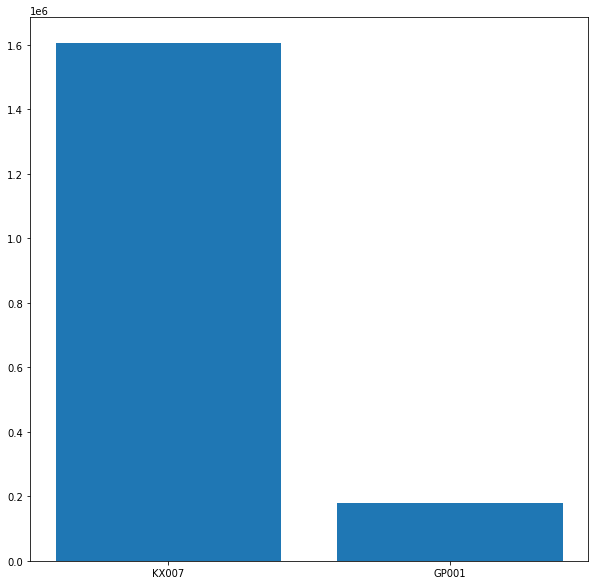

In [15]:
plt.figure(figsize = (10, 10))
x=df_FC_ID['CORP_ID']
y=df_FC_ID['count']
plt.bar(x,y)
plt.show()

#### **BKG_DATE**

In [16]:
FC['BKG_DATE'].unique()

array([20210303, 20210302, 20210301, 20210304, 20210305, 20210307,
       20210306, 20210308, 20210309, 20210310, 20210311, 20210312,
       20210314, 20210313, 20210315, 20210316, 20210317, 20210318,
       20210319, 20210320, 20210321, 20210322, 20210323, 20210324,
       20210325, 20210326, 20210327, 20210328, 20210329, 20210330,
       20210331, 20210401, 20210406, 20210402, 20210405, 20210403,
       20210404, 20210411, 20210407, 20210408, 20210409, 20210410,
       20210412, 20210413, 20210414, 20210416, 20210415, 20210417,
       20210418, 20210419, 20210422, 20210420, 20210421, 20210423,
       20210425, 20210426, 20210427, 20210424, 20210428, 20210430,
       20210429, 20210524, 20210503, 20210501, 20210502, 20210507,
       20210505, 20210506, 20210508, 20210509, 20210504, 20210510,
       20210511, 20210512, 20210513, 20210514, 20210517, 20210515,
       20210516, 20210518, 20210519, 20210520, 20210521, 20210523,
       20210522, 20210528, 20210525, 20210526, 20210527, 20210

In [17]:
FC['BKG_DATE'].dtype

dtype('int64')

In [18]:
#Datetime으로 변환

FC['BKG_DATE']= FC['BKG_DATE'].astype('str')
FC['BKG_DATE']=pd.to_datetime(FC['BKG_DATE'])
FC['BKG_DATE']

0         2021-03-03
1         2021-03-03
2         2021-03-03
3         2021-03-03
4         2021-03-03
             ...    
1786369   2021-06-28
1786370   2021-06-28
1786371   2021-06-28
1786372   2021-06-28
1786373   2021-06-28
Name: BKG_DATE, Length: 1786374, dtype: datetime64[ns]

In [19]:
FC

,Unnamed: 0,CORP_ID,REF_ORD_NO,BKG_NO,BKG_TYP,BKG_DATE,BKG_TIME,SHPR_CD,INV_AMT,ITEM_SEQ,...,DLVSUBCLSFCD,INS_ID,INS_DATE,INS_TIME,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
0,0,KX007,2021030365922551,KX007210303370934,7,2021-03-03,35510,90001302,22400.0,2.0,...,1,iNEXBatch,20210303,131425,3.0,N,세종특별자치시,NaN,서울특별시,서대문구
1,1,KX007,2021030365922951,KX007210303371080,7,2021-03-03,35521,90001441,20900.0,1.0,...,4,iNEXBatch,20210303,131425,50.0,N,경기도,광주시,경상남도,김해시
2,2,KX007,2021030365924361,KX007210303371081,7,2021-03-03,35513,90001441,37900.0,1.0,...,0,iNEXBatch,20210303,131425,53.0,N,경기도,광주시,경상남도,거제시
3,3,KX007,2021030365928921,KX007210303371205,7,2021-03-03,35608,90001542,69800.0,1.0,...,1,iNEXBatch,20210303,131425,6.0,N,경기도,광주시,서울특별시,서초구
4,4,KX007,2021030365930451,KX007210303370967,7,2021-03-03,35551,90001341,73700.0,1.0,...,1,iNEXBatch,20210303,131425,10.0,N,경기도,광주시,경기도,김포시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1786369,1786369,GP001,201806270001,GP001210628546912,7,2021-06-28,91210,90001772,NaN,16.0,...,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN
1786370,1786370,GP001,201806270001,GP001210628546912,7,2021-06-28,91210,90001772,NaN,17.0,...,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN
1786371,1786371,GP001,201806270001,GP001210628546912,7,2021-06-28,91210,90001772,NaN,18.0,...,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN
1786372,1786372,GP001,201806270001,GP001210628546912,7,2021-06-28,91210,90001772,NaN,19.0,...,1,osulloc01,20210628,91210,10.0,N,경기도,군포시,경기도,NaN


In [20]:
FC['BKG_DATE'].value_counts()

2021-06-30    44310
2021-06-08    39145
2021-06-13    36425
2021-05-17    36024
2021-06-07    32761
              ...  
2021-03-12     6025
2021-03-13     5943
2021-03-20     5856
2021-03-06     5512
2021-04-10     5029
Name: BKG_DATE, Length: 122, dtype: int64

In [21]:
# 주문날짜 별 주문량
FC_DT = FC['BKG_DATE'].value_counts()
df_FC_DT = DataFrame(FC_DT)
df_FC_DT = df_FC_DT.reset_index()
df_FC_DT = df_FC_DT.rename(columns={'index':'BKG_DATE','BKG_DATE':'count'})
df_FC_DT = df_FC_DT.sort_values(by=[df_FC_DT.columns[0]],ascending=True)
df_FC_DT

,BKG_DATE,count
97,2021-03-01,8536
66,2021-03-02,11912
53,2021-03-03,13756
78,2021-03-04,10330
58,2021-03-05,12929
...,...,...
40,2021-06-26,16404
20,2021-06-27,20792
7,2021-06-28,28663
15,2021-06-29,22477


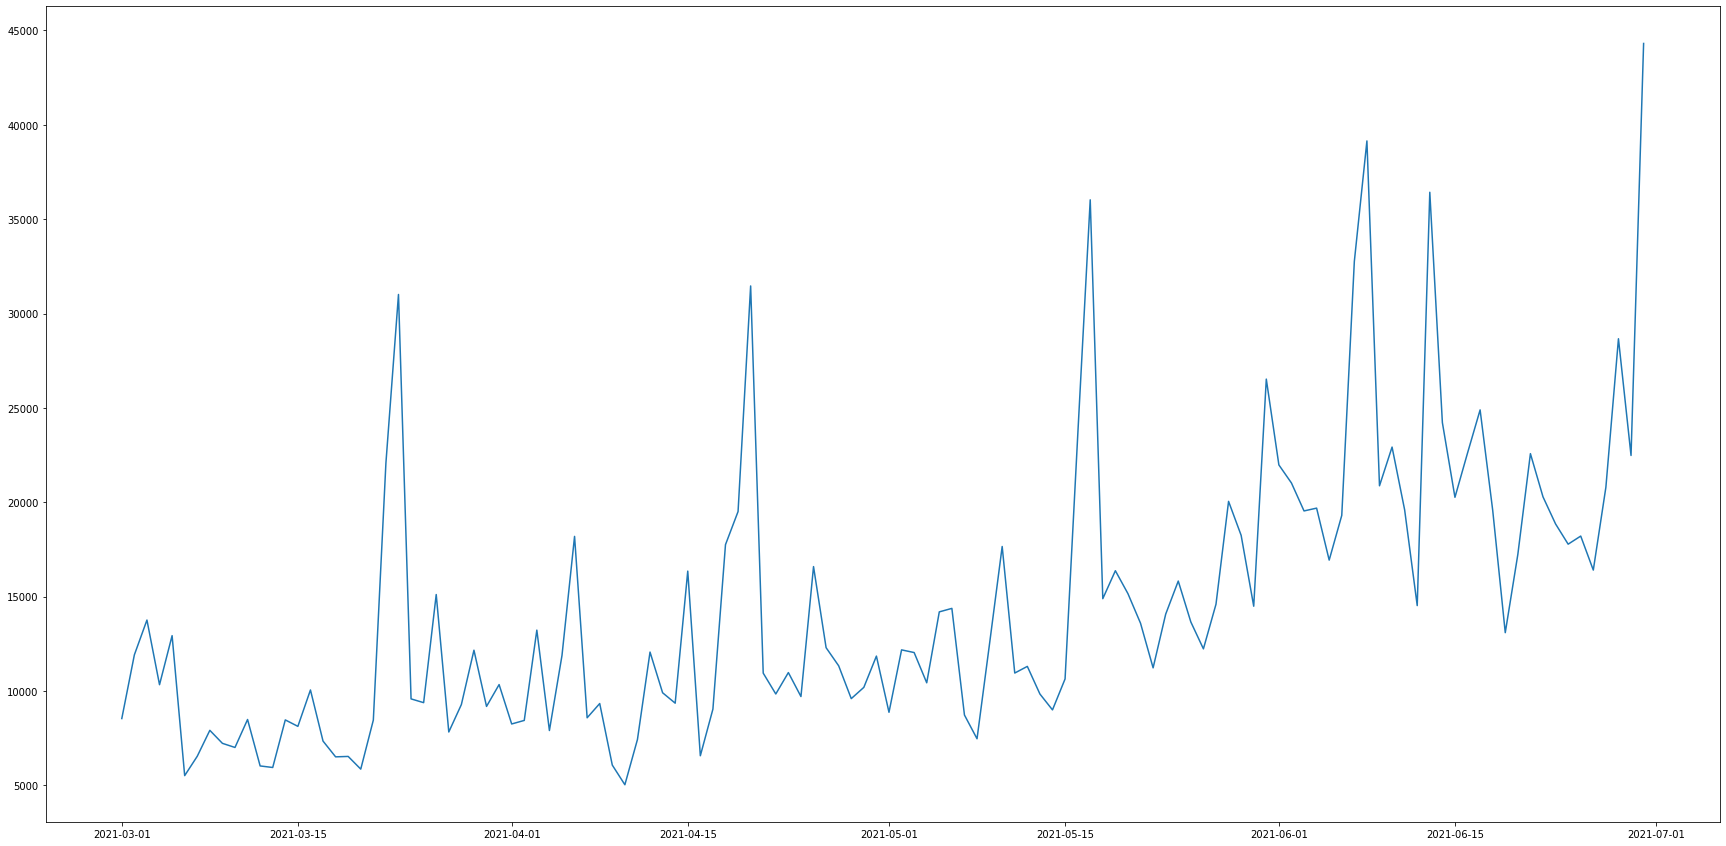

In [22]:
plt.figure(figsize = (30, 15))
x=df_FC_DT['BKG_DATE']
y=df_FC_DT['count']
plt.plot(x,y)
plt.show()

In [23]:
#요일별 확인 .weekday()

from datetime import date

df_FC_DT['weekday'] = df_FC_DT['BKG_DATE'].dt.dayofweek
df_FC_DT

,BKG_DATE,count,weekday
97,2021-03-01,8536,0
66,2021-03-02,11912,1
53,2021-03-03,13756,2
78,2021-03-04,10330,3
58,2021-03-05,12929,4
...,...,...,...
40,2021-06-26,16404,5
20,2021-06-27,20792,6
7,2021-06-28,28663,0
15,2021-06-29,22477,1


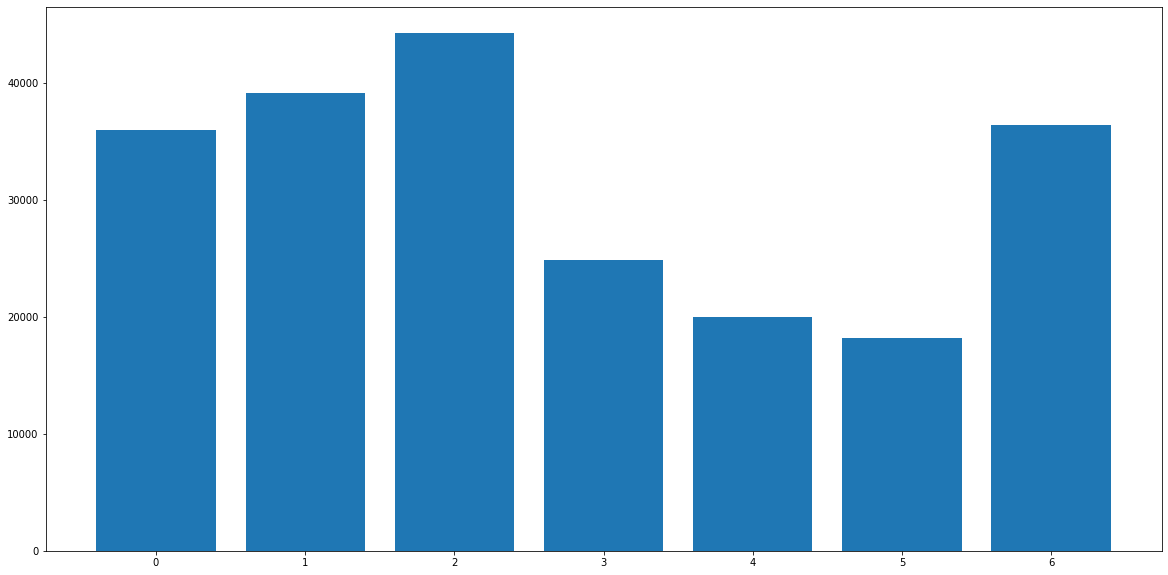

In [24]:
plt.figure(figsize = (20, 10))
x=df_FC_DT['weekday']
y=df_FC_DT['count']
plt.bar(x,y)
plt.show()

In [25]:
FC['weekday'] = FC['BKG_DATE'].dt.dayofweek
FC[['CORP_ID','BKG_DATE','weekday','BKG_TIME','SHPR_CD','ITEM_CD','ITEM_QTY']]

,CORP_ID,BKG_DATE,weekday,BKG_TIME,SHPR_CD,ITEM_CD,ITEM_QTY
0,KX007,2021-03-03,2,35510,90001302,134265392,1.0
1,KX007,2021-03-03,2,35521,90001441,4610261043_2,1.0
2,KX007,2021-03-03,2,35513,90001441,4936599538_1,1.0
3,KX007,2021-03-03,2,35608,90001542,3858391637_1,1.0
4,KX007,2021-03-03,2,35551,90001341,4631307460,1.0
...,...,...,...,...,...,...,...
1786369,GP001,2021-06-28,0,91210,90001772,00281,100.0
1786370,GP001,2021-06-28,0,91210,90001772,00316,168.0
1786371,GP001,2021-06-28,0,91210,90001772,00338,100.0
1786372,GP001,2021-06-28,0,91210,90001772,00183,50.0


#### **센터별 고객사 다름 확인**

In [26]:
FC['SHPR_CD'].unique()

array([90001302, 90001441, 90001542, 90001341, 90001541, 90001443,
       90001381, 90001521, 90001502, 90001562, 90001582, 90001602,
       90001683, 90001622, 90001662, 90001682, 90001705, 90001664,
       90001703, 90001702, 90001704, 90001768, 90001776, 90001765,
       90001774, 90001762, 90001772, 90001842, 90001802])

In [27]:
FC_KX = FC.query('CORP_ID=="KX007"')
FC_KX['SHPR_CD'].unique()
# 16개 고객사

array([90001302, 90001441, 90001542, 90001341, 90001541, 90001443,
       90001381, 90001521, 90001502, 90001562, 90001582, 90001602,
       90001683, 90001622, 90001662, 90001682])

In [28]:
FC_KX = FC.query('CORP_ID=="GP001"')
FC_KX['SHPR_CD'].unique()
# 13개 고객사

array([90001705, 90001664, 90001703, 90001702, 90001704, 90001768,
       90001776, 90001765, 90001774, 90001762, 90001772, 90001842,
       90001802])

#### **센터별, 고객사별, 날짜별 주문량**

In [29]:
FC_ID_SH = FC[['REF_ORD_NO','CORP_ID','BKG_DATE','SHPR_CD']]
FC_ID_SH = FC_ID_SH.groupby(['CORP_ID','SHPR_CD','BKG_DATE']).count()
FC_ID_SH = FC_ID_SH.rename(columns={'REF_ORD_NO':'count'})
FC_ID_SH

count
CORP_ID SHPR_CD  BKG_DATE         
GP001   90001664 2021-05-27     27
                 2021-05-31     43
                 2021-06-01     50
                 2021-06-02     52
                 2021-06-03     36
...                            ...
KX007   90001683 2021-06-26     93
                 2021-06-27    246
                 2021-06-28     84
                 2021-06-29     64
                 2021-06-30    138

[1593 rows x 1 columns]

#### **곤지암센터에서의 날짜별 주문량**

In [30]:
FC_KX = FC.query('CORP_ID=="KX007"')
FC_KX= FC_KX[['REF_ORD_NO','CORP_ID','BKG_DATE','SHPR_CD']]
FC_KX

,REF_ORD_NO,CORP_ID,BKG_DATE,SHPR_CD
0,2021030365922551,KX007,2021-03-03,90001302
1,2021030365922951,KX007,2021-03-03,90001441
2,2021030365924361,KX007,2021-03-03,90001441
3,2021030365928921,KX007,2021-03-03,90001542
4,2021030365930451,KX007,2021-03-03,90001341
...,...,...,...,...
1786347,2021062954478421,KX007,2021-06-29,90001443
1786348,2021063067849541,KX007,2021-06-30,90001662
1786349,2021063078029521_1,KX007,2021-06-30,90001443
1786354,2021062966256441,KX007,2021-06-29,90001622


In [31]:
FC_KX_c= FC_KX[['REF_ORD_NO','BKG_DATE','SHPR_CD']]
FC_KX_c

,REF_ORD_NO,BKG_DATE,SHPR_CD
0,2021030365922551,2021-03-03,90001302
1,2021030365922951,2021-03-03,90001441
2,2021030365924361,2021-03-03,90001441
3,2021030365928921,2021-03-03,90001542
4,2021030365930451,2021-03-03,90001341
...,...,...,...
1786347,2021062954478421,2021-06-29,90001443
1786348,2021063067849541,2021-06-30,90001662
1786349,2021063078029521_1,2021-06-30,90001443
1786354,2021062966256441,2021-06-29,90001622


In [32]:
FC_KX_c_g = FC_KX_c.groupby(['BKG_DATE']).count()
FC_KX_c_g = FC_KX_c_g.rename(columns={'REF_ORD_NO':'count'})
FC_KX_c_g = FC_KX_c_g.drop(['SHPR_CD'],axis=1)
FC_KX_c_g = FC_KX_c_g.reset_index()
FC_KX_c_g

,BKG_DATE,count
0,2021-03-01,8536
1,2021-03-02,11912
2,2021-03-03,13756
3,2021-03-04,10330
4,2021-03-05,12929
...,...,...
117,2021-06-26,12741
118,2021-06-27,15589
119,2021-06-28,18636
120,2021-06-29,15412


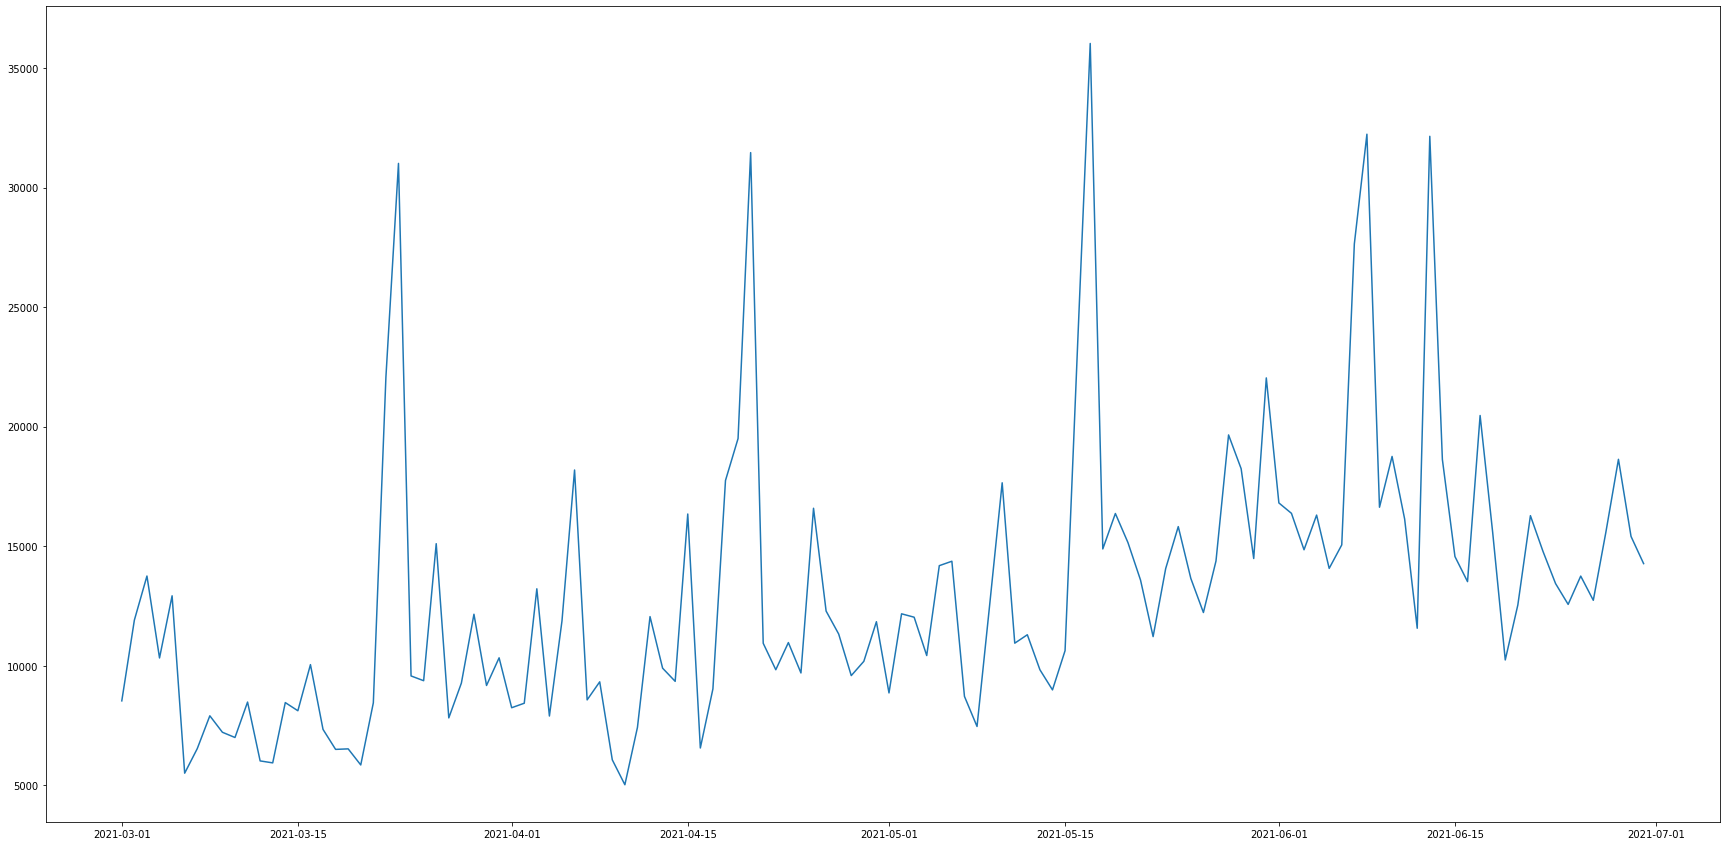

In [33]:
plt.figure(figsize = (30, 15))

x = FC_KX_c_g['BKG_DATE']
y = FC_KX_c_g['count']

plt.plot(x,y)

#### **고객사 별 날짜 별 주문 수량 계산**

In [34]:
#고객사 90001302

SH_90001302 = FC_KX_c.query('SHPR_CD==90001302')
SH_90001302 = SH_90001302.groupby(['BKG_DATE']).count()
SH_90001302 = SH_90001302.rename(columns={'REF_ORD_NO':'SH_90001302'})
SH_90001302 = SH_90001302.drop(['SHPR_CD'],axis='columns')
SH_90001302 = SH_90001302.reset_index()
SH_90001302.set_index('BKG_DATE',inplace=True)
SH_90001302

,SH_90001302
BKG_DATE,
2021-03-01,2190
2021-03-02,3822
2021-03-03,1844
2021-03-04,1698
2021-03-05,1501
...,...
2021-06-26,1766
2021-06-27,2292
2021-06-28,2356


In [35]:
#고객사 90001441

SH_90001441 = FC_KX_c.query('SHPR_CD==90001441')
SH_90001441 = SH_90001441.groupby(['BKG_DATE']).count()
SH_90001441 = SH_90001441.rename(columns={'REF_ORD_NO':'SH_90001441'})
SH_90001441 = SH_90001441.drop(['SHPR_CD'],axis='columns')
SH_90001441 = SH_90001441.reset_index()
SH_90001441.set_index('BKG_DATE',inplace=True)
SH_90001441

,SH_90001441
BKG_DATE,
2021-03-01,994
2021-03-02,3024
2021-03-03,7351
2021-03-04,1045
2021-03-05,619
...,...
2021-06-26,566
2021-06-27,721
2021-06-28,760


In [36]:
#고객사 90001542

SH_90001542 = FC_KX_c.query('SHPR_CD==90001542')
SH_90001542 = SH_90001542.groupby(['BKG_DATE']).count()
SH_90001542 = SH_90001542.rename(columns={'REF_ORD_NO':'SH_90001542'})
SH_90001542 = SH_90001542.drop(['SHPR_CD'],axis='columns')
SH_90001542 = SH_90001542.reset_index()
SH_90001542.set_index('BKG_DATE',inplace=True)
SH_90001542

,SH_90001542
BKG_DATE,
2021-03-01,2052
2021-03-02,1491
2021-03-03,1408
2021-03-04,1352
2021-03-05,1144
...,...
2021-06-26,1031
2021-06-27,2017
2021-06-28,1186


In [37]:
#고객사 90001341

SH_90001341 = FC_KX_c.query('SHPR_CD==90001341')
SH_90001341 = SH_90001341.groupby(['BKG_DATE']).count()
SH_90001341 = SH_90001341.rename(columns={'REF_ORD_NO':'SH_90001341'})
SH_90001341 = SH_90001341.drop(['SHPR_CD'],axis='columns')
SH_90001341 = SH_90001341.reset_index()
SH_90001341.set_index('BKG_DATE',inplace=True)
SH_90001341

,SH_90001341
BKG_DATE,
2021-03-01,1384
2021-03-02,1186
2021-03-03,1125
2021-03-04,3283
2021-03-05,8178
...,...
2021-06-26,791
2021-06-27,1226
2021-06-28,1199


In [38]:
#고객사 90001541

SH_90001541 = FC_KX_c.query('SHPR_CD==90001541')
SH_90001541 = SH_90001541.groupby(['BKG_DATE']).count()
SH_90001541 = SH_90001541.rename(columns={'REF_ORD_NO':'SH_90001541'})
SH_90001541 = SH_90001541.drop(['SHPR_CD'],axis='columns')
SH_90001541 = SH_90001541.reset_index()
SH_90001541.set_index('BKG_DATE',inplace=True)
SH_90001541

,SH_90001541
BKG_DATE,
2021-03-01,1035
2021-03-02,1371
2021-03-03,1141
2021-03-04,1137
2021-03-05,811
...,...
2021-06-26,649
2021-06-27,946
2021-06-28,1436


In [39]:
#고객사 90001443

SH_90001443 = FC_KX_c.query('SHPR_CD==90001443')
SH_90001443 = SH_90001443.groupby(['BKG_DATE']).count()
SH_90001443 = SH_90001443.rename(columns={'REF_ORD_NO':'SH_90001443'})
SH_90001443 = SH_90001443.drop(['SHPR_CD'],axis='columns')
SH_90001443 = SH_90001443.reset_index()
SH_90001443.set_index('BKG_DATE',inplace=True)
SH_90001443

,SH_90001443
BKG_DATE,
2021-03-01,500
2021-03-02,525
2021-03-03,428
2021-03-04,470
2021-03-05,350
...,...
2021-06-26,4123
2021-06-27,1912
2021-06-28,3018


In [40]:
#고객사 90001381

SH_90001381 = FC_KX_c.query('SHPR_CD==90001381')
SH_90001381 = SH_90001381.groupby(['BKG_DATE']).count()
SH_90001381 = SH_90001381.rename(columns={'REF_ORD_NO':'SH_90001381'})
SH_90001381 = SH_90001381.drop(['SHPR_CD'],axis='columns')
SH_90001381 = SH_90001381.reset_index()
SH_90001381.set_index('BKG_DATE',inplace=True)
SH_90001381

,SH_90001381
BKG_DATE,
2021-03-01,154
2021-03-02,105
2021-03-03,100
2021-03-04,61
2021-03-05,76
...,...
2021-04-28,77
2021-04-29,87
2021-04-30,76


In [41]:
#고객사 90001521

SH_90001521 = FC_KX_c.query('SHPR_CD==90001521')
SH_90001521 = SH_90001521.groupby(['BKG_DATE']).count()
SH_90001521 = SH_90001521.rename(columns={'REF_ORD_NO':'SH_90001521'})
SH_90001521 = SH_90001521.drop(['SHPR_CD'],axis='columns')
SH_90001521 = SH_90001521.reset_index()
SH_90001521.set_index('BKG_DATE',inplace=True)
SH_90001521

,SH_90001521
BKG_DATE,
2021-03-01,133
2021-03-02,268
2021-03-03,181
2021-03-04,1139
2021-03-05,132
...,...
2021-06-26,287
2021-06-27,349
2021-06-28,1788


In [42]:
#고객사 90001502

SH_90001502 = FC_KX_c.query('SHPR_CD==90001502')
SH_90001502 = SH_90001502.groupby(['BKG_DATE']).count()
SH_90001502 = SH_90001502.rename(columns={'REF_ORD_NO':'SH_90001502'})
SH_90001502 = SH_90001502.drop(['SHPR_CD'],axis='columns')
SH_90001502 = SH_90001502.reset_index()
SH_90001502.set_index('BKG_DATE',inplace=True)
SH_90001502

,SH_90001502
BKG_DATE,
2021-03-01,94
2021-03-02,120
2021-03-03,178
2021-03-04,145
2021-03-05,118
...,...
2021-06-18,42
2021-06-19,2
2021-06-20,11


In [43]:
#고객사 90001562

SH_90001562 = FC_KX_c.query('SHPR_CD==90001562')
SH_90001562 = SH_90001562.groupby(['BKG_DATE']).count()
SH_90001562 = SH_90001562.rename(columns={'REF_ORD_NO':'SH_90001562'})
SH_90001562 = SH_90001562.drop(['SHPR_CD'],axis='columns')
SH_90001562 = SH_90001562.reset_index()
SH_90001562.set_index('BKG_DATE',inplace=True)
SH_90001562

,SH_90001562
BKG_DATE,
2021-03-11,1108
2021-03-16,1


In [44]:
#고객사 90001582

SH_90001582 = FC_KX_c.query('SHPR_CD==90001582')
SH_90001582 = SH_90001582.groupby(['BKG_DATE']).count()
SH_90001582 = SH_90001582.rename(columns={'REF_ORD_NO':'SH_90001582'})
SH_90001582 = SH_90001582.drop(['SHPR_CD'],axis='columns')
SH_90001582 = SH_90001582.reset_index()
SH_90001582.set_index('BKG_DATE',inplace=True)
SH_90001582

,SH_90001582
BKG_DATE,
2021-03-31,186
2021-04-01,245
2021-04-02,304
2021-04-03,241
2021-04-04,290
...,...
2021-06-26,821
2021-06-27,1943
2021-06-28,3201


In [45]:
#고객사 90001602

SH_90001602 = FC_KX_c.query('SHPR_CD==90001602')
SH_90001602 = SH_90001602.groupby(['BKG_DATE']).count()
SH_90001602 = SH_90001602.rename(columns={'REF_ORD_NO':'SH_90001602'})
SH_90001602 = SH_90001602.drop(['SHPR_CD'],axis='columns')
SH_90001602 = SH_90001602.reset_index()
SH_90001602.set_index('BKG_DATE',inplace=True)
SH_90001602

,SH_90001602
BKG_DATE,
2021-04-19,1
2021-04-21,1165
2021-04-22,1531
2021-04-23,1242
2021-04-24,1077
...,...
2021-06-26,953
2021-06-27,1560
2021-06-28,1516


In [46]:
#고객사 90001683

SH_90001683 = FC_KX_c.query('SHPR_CD==90001683')
SH_90001683 = SH_90001683.groupby(['BKG_DATE']).count()
SH_90001683 = SH_90001683.rename(columns={'REF_ORD_NO':'SH_90001683'})
SH_90001683 = SH_90001683.drop(['SHPR_CD'],axis='columns')
SH_90001683 = SH_90001683.reset_index()
SH_90001683.set_index('BKG_DATE',inplace=True)
SH_90001683

,SH_90001683
BKG_DATE,
2021-05-24,20
2021-05-25,74
2021-05-26,104
2021-05-27,216
2021-05-28,47
2021-05-29,71
2021-05-30,296
2021-05-31,1720
2021-06-01,164


In [47]:
#고객사 90001622

SH_90001622 = FC_KX_c.query('SHPR_CD==90001622')
SH_90001622 = SH_90001622.groupby(['BKG_DATE']).count()
SH_90001622 = SH_90001622.rename(columns={'REF_ORD_NO':'SH_90001622'})
SH_90001622 = SH_90001622.drop(['SHPR_CD'],axis='columns')
SH_90001622 = SH_90001622.reset_index()
SH_90001622.set_index('BKG_DATE',inplace=True)
SH_90001622

,SH_90001622
BKG_DATE,
2021-05-04,7
2021-05-09,1
2021-05-10,4
2021-05-12,260
2021-05-13,371
2021-05-14,415
2021-05-15,483
2021-05-16,685
2021-05-17,812


In [48]:
#고객사 90001662

SH_90001662 = FC_KX_c.query('SHPR_CD==90001662')
SH_90001662 = SH_90001662.groupby(['BKG_DATE']).count()
SH_90001662 = SH_90001662.rename(columns={'REF_ORD_NO':'SH_90001662'})
SH_90001662 = SH_90001662.drop(['SHPR_CD'],axis='columns')
SH_90001662 = SH_90001662.reset_index()
SH_90001662.set_index('BKG_DATE',inplace=True)
SH_90001662

,SH_90001662
BKG_DATE,
2021-05-10,83
2021-05-11,108
2021-05-12,116
2021-05-13,109
2021-05-14,92
2021-05-15,79
2021-05-16,122
2021-05-17,134
2021-05-18,283


In [49]:
#고객사 90001682

SH_90001682 = FC_KX_c.query('SHPR_CD==90001682')
SH_90001682 = SH_90001682.groupby(['BKG_DATE']).count()
SH_90001682 = SH_90001682.rename(columns={'REF_ORD_NO':'SH_90001682'})
SH_90001682 = SH_90001682.drop(['SHPR_CD'],axis='columns')
SH_90001682 = SH_90001682.reset_index()
SH_90001682.set_index('BKG_DATE',inplace=True)
SH_90001682

,SH_90001682
BKG_DATE,
2021-05-27,462
2021-05-28,593
2021-05-29,475
2021-05-30,878
2021-05-31,1296
2021-06-01,1151
2021-06-02,1085
2021-06-03,996
2021-06-04,756


In [50]:
#FC_KX_c = FC_KX_c.groupby(['SHPR_CD','BKG_DATE']).count()
#FC_KX_c

#### **고객사별 날짜별 주문량 확인**

In [51]:
KX_d = FC_KX_c['BKG_DATE'].unique()
column_name = ['BKG_DATE']
KX_d = DataFrame(KX_d,columns=column_name)
KX_d

,BKG_DATE
0,2021-03-03
1,2021-03-02
2,2021-03-01
3,2021-03-04
4,2021-03-05
...,...
117,2021-06-26
118,2021-06-27
119,2021-06-25
120,2021-06-28


In [52]:
df = pd.concat([SH_90001302, SH_90001441,SH_90001542, SH_90001341, SH_90001541, SH_90001443, SH_90001381, SH_90001521, SH_90001502, SH_90001562, SH_90001582, SH_90001602, SH_90001683, SH_90001622, SH_90001662, SH_90001682],axis=1)
df

,SH_90001302,SH_90001441,SH_90001542,SH_90001341,SH_90001541,SH_90001443,SH_90001381,SH_90001521,SH_90001502,SH_90001562,SH_90001582,SH_90001602,SH_90001683,SH_90001622,SH_90001662,SH_90001682
BKG_DATE,,,,,,,,,,,,,,,,
2021-03-01,2190,994,2052,1384,1035,500,154.0,133,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-02,3822,3024,1491,1186,1371,525,105.0,268,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-03,1844,7351,1408,1125,1141,428,100.0,181,178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-04,1698,1045,1352,3283,1137,470,61.0,1139,145.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-05,1501,619,1144,8178,811,350,76.0,132,118.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-26,1766,566,1031,791,649,4123,NaN,287,NaN,NaN,821.0,953.0,93.0,745.0,104.0,812.0
2021-06-27,2292,721,2017,1226,946,1912,NaN,349,NaN,NaN,1943.0,1560.0,246.0,1057.0,143.0,1177.0
2021-06-28,2356,760,1186,1199,1436,3018,NaN,1788,NaN,NaN,3201.0,1516.0,84.0,950.0,147.0,995.0


In [53]:
df = df.reset_index()
df

,BKG_DATE,SH_90001302,SH_90001441,SH_90001542,SH_90001341,SH_90001541,SH_90001443,SH_90001381,SH_90001521,SH_90001502,SH_90001562,SH_90001582,SH_90001602,SH_90001683,SH_90001622,SH_90001662,SH_90001682
0,2021-03-01,2190,994,2052,1384,1035,500,154.0,133,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-03-02,3822,3024,1491,1186,1371,525,105.0,268,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-03-03,1844,7351,1408,1125,1141,428,100.0,181,178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-03-04,1698,1045,1352,3283,1137,470,61.0,1139,145.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-03-05,1501,619,1144,8178,811,350,76.0,132,118.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2021-06-26,1766,566,1031,791,649,4123,NaN,287,NaN,NaN,821.0,953.0,93.0,745.0,104.0,812.0
118,2021-06-27,2292,721,2017,1226,946,1912,NaN,349,NaN,NaN,1943.0,1560.0,246.0,1057.0,143.0,1177.0
119,2021-06-28,2356,760,1186,1199,1436,3018,NaN,1788,NaN,NaN,3201.0,1516.0,84.0,950.0,147.0,995.0
120,2021-06-29,2660,799,1424,1581,1128,913,NaN,647,NaN,NaN,1350.0,1544.0,64.0,1950.0,153.0,1199.0


In [54]:
df = df.fillna(0)
df

,BKG_DATE,SH_90001302,SH_90001441,SH_90001542,SH_90001341,SH_90001541,SH_90001443,SH_90001381,SH_90001521,SH_90001502,SH_90001562,SH_90001582,SH_90001602,SH_90001683,SH_90001622,SH_90001662,SH_90001682
0,2021-03-01,2190,994,2052,1384,1035,500,154.0,133,94.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-03-02,3822,3024,1491,1186,1371,525,105.0,268,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-03-03,1844,7351,1408,1125,1141,428,100.0,181,178.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-03-04,1698,1045,1352,3283,1137,470,61.0,1139,145.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-03-05,1501,619,1144,8178,811,350,76.0,132,118.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2021-06-26,1766,566,1031,791,649,4123,0.0,287,0.0,0.0,821.0,953.0,93.0,745.0,104.0,812.0
118,2021-06-27,2292,721,2017,1226,946,1912,0.0,349,0.0,0.0,1943.0,1560.0,246.0,1057.0,143.0,1177.0
119,2021-06-28,2356,760,1186,1199,1436,3018,0.0,1788,0.0,0.0,3201.0,1516.0,84.0,950.0,147.0,995.0
120,2021-06-29,2660,799,1424,1581,1128,913,0.0,647,0.0,0.0,1350.0,1544.0,64.0,1950.0,153.0,1199.0


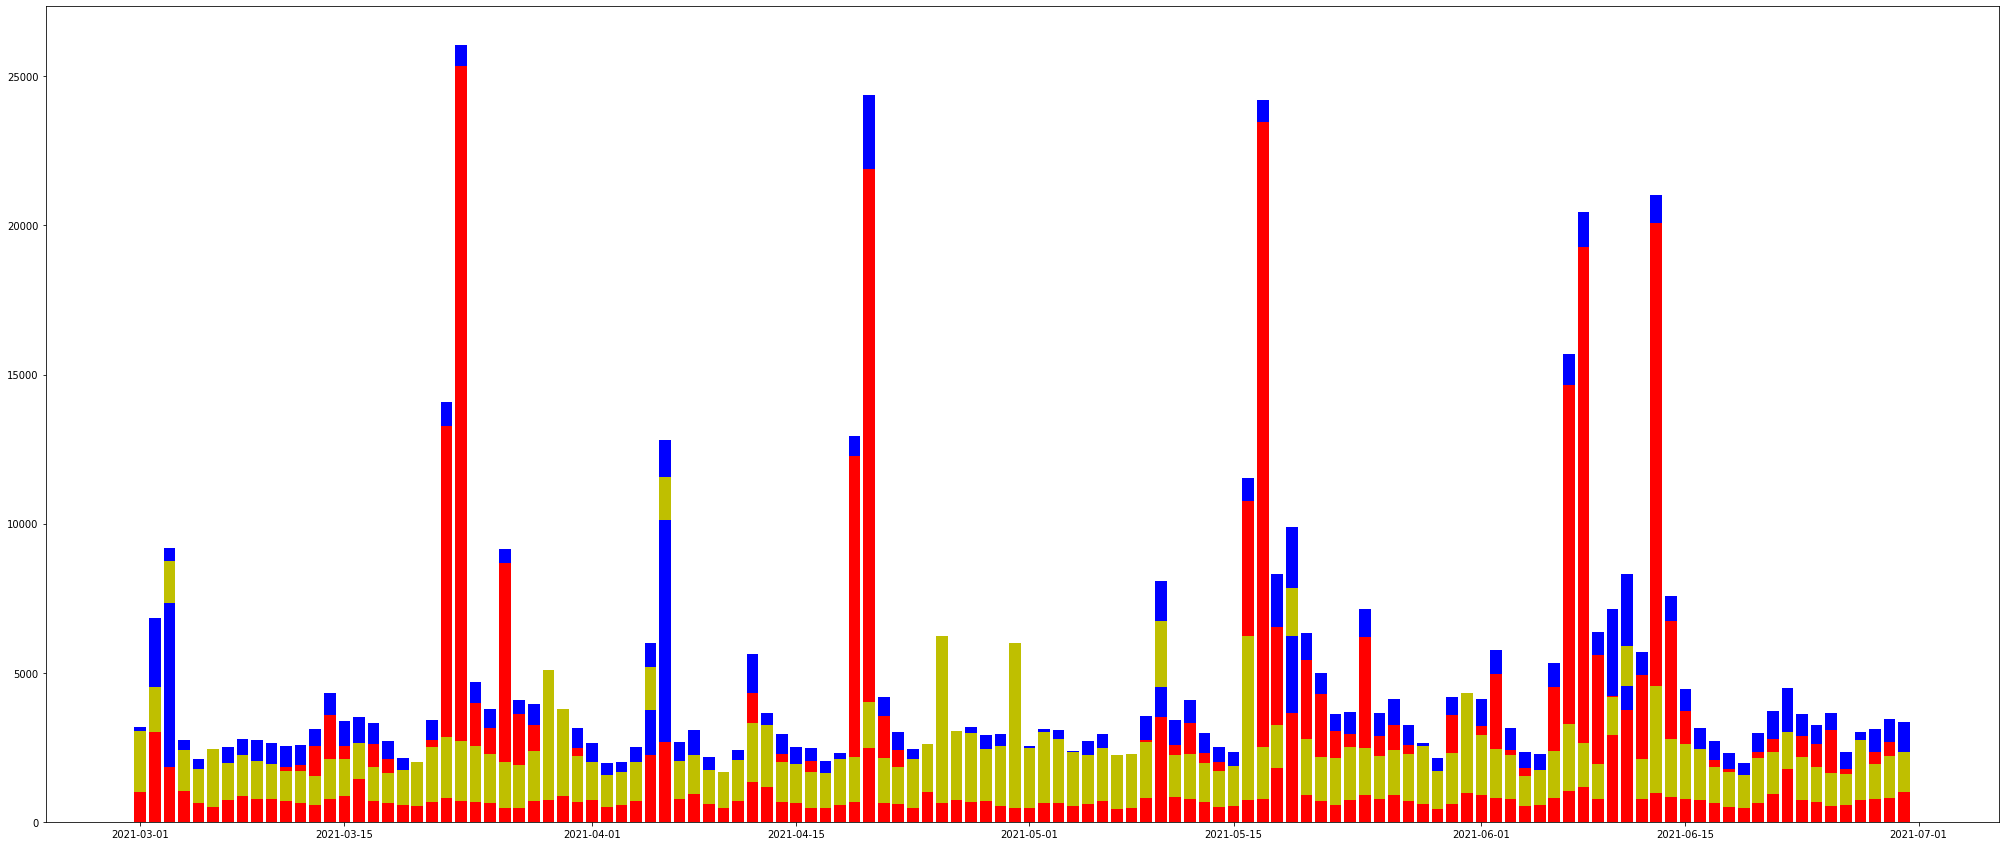

In [55]:
# 3개 고객사 주문수량

plt.figure(figsize = (35, 15))

X = df['BKG_DATE']
data1 = df['SH_90001302']
data2 = df['SH_90001441']
data3 = df['SH_90001542']

plt.bar(X, data1,color='r')
plt.bar(X, data2,color='b',bottom=data1)
plt.bar(X, data3,color='y',bottom=data2)

plt.show()

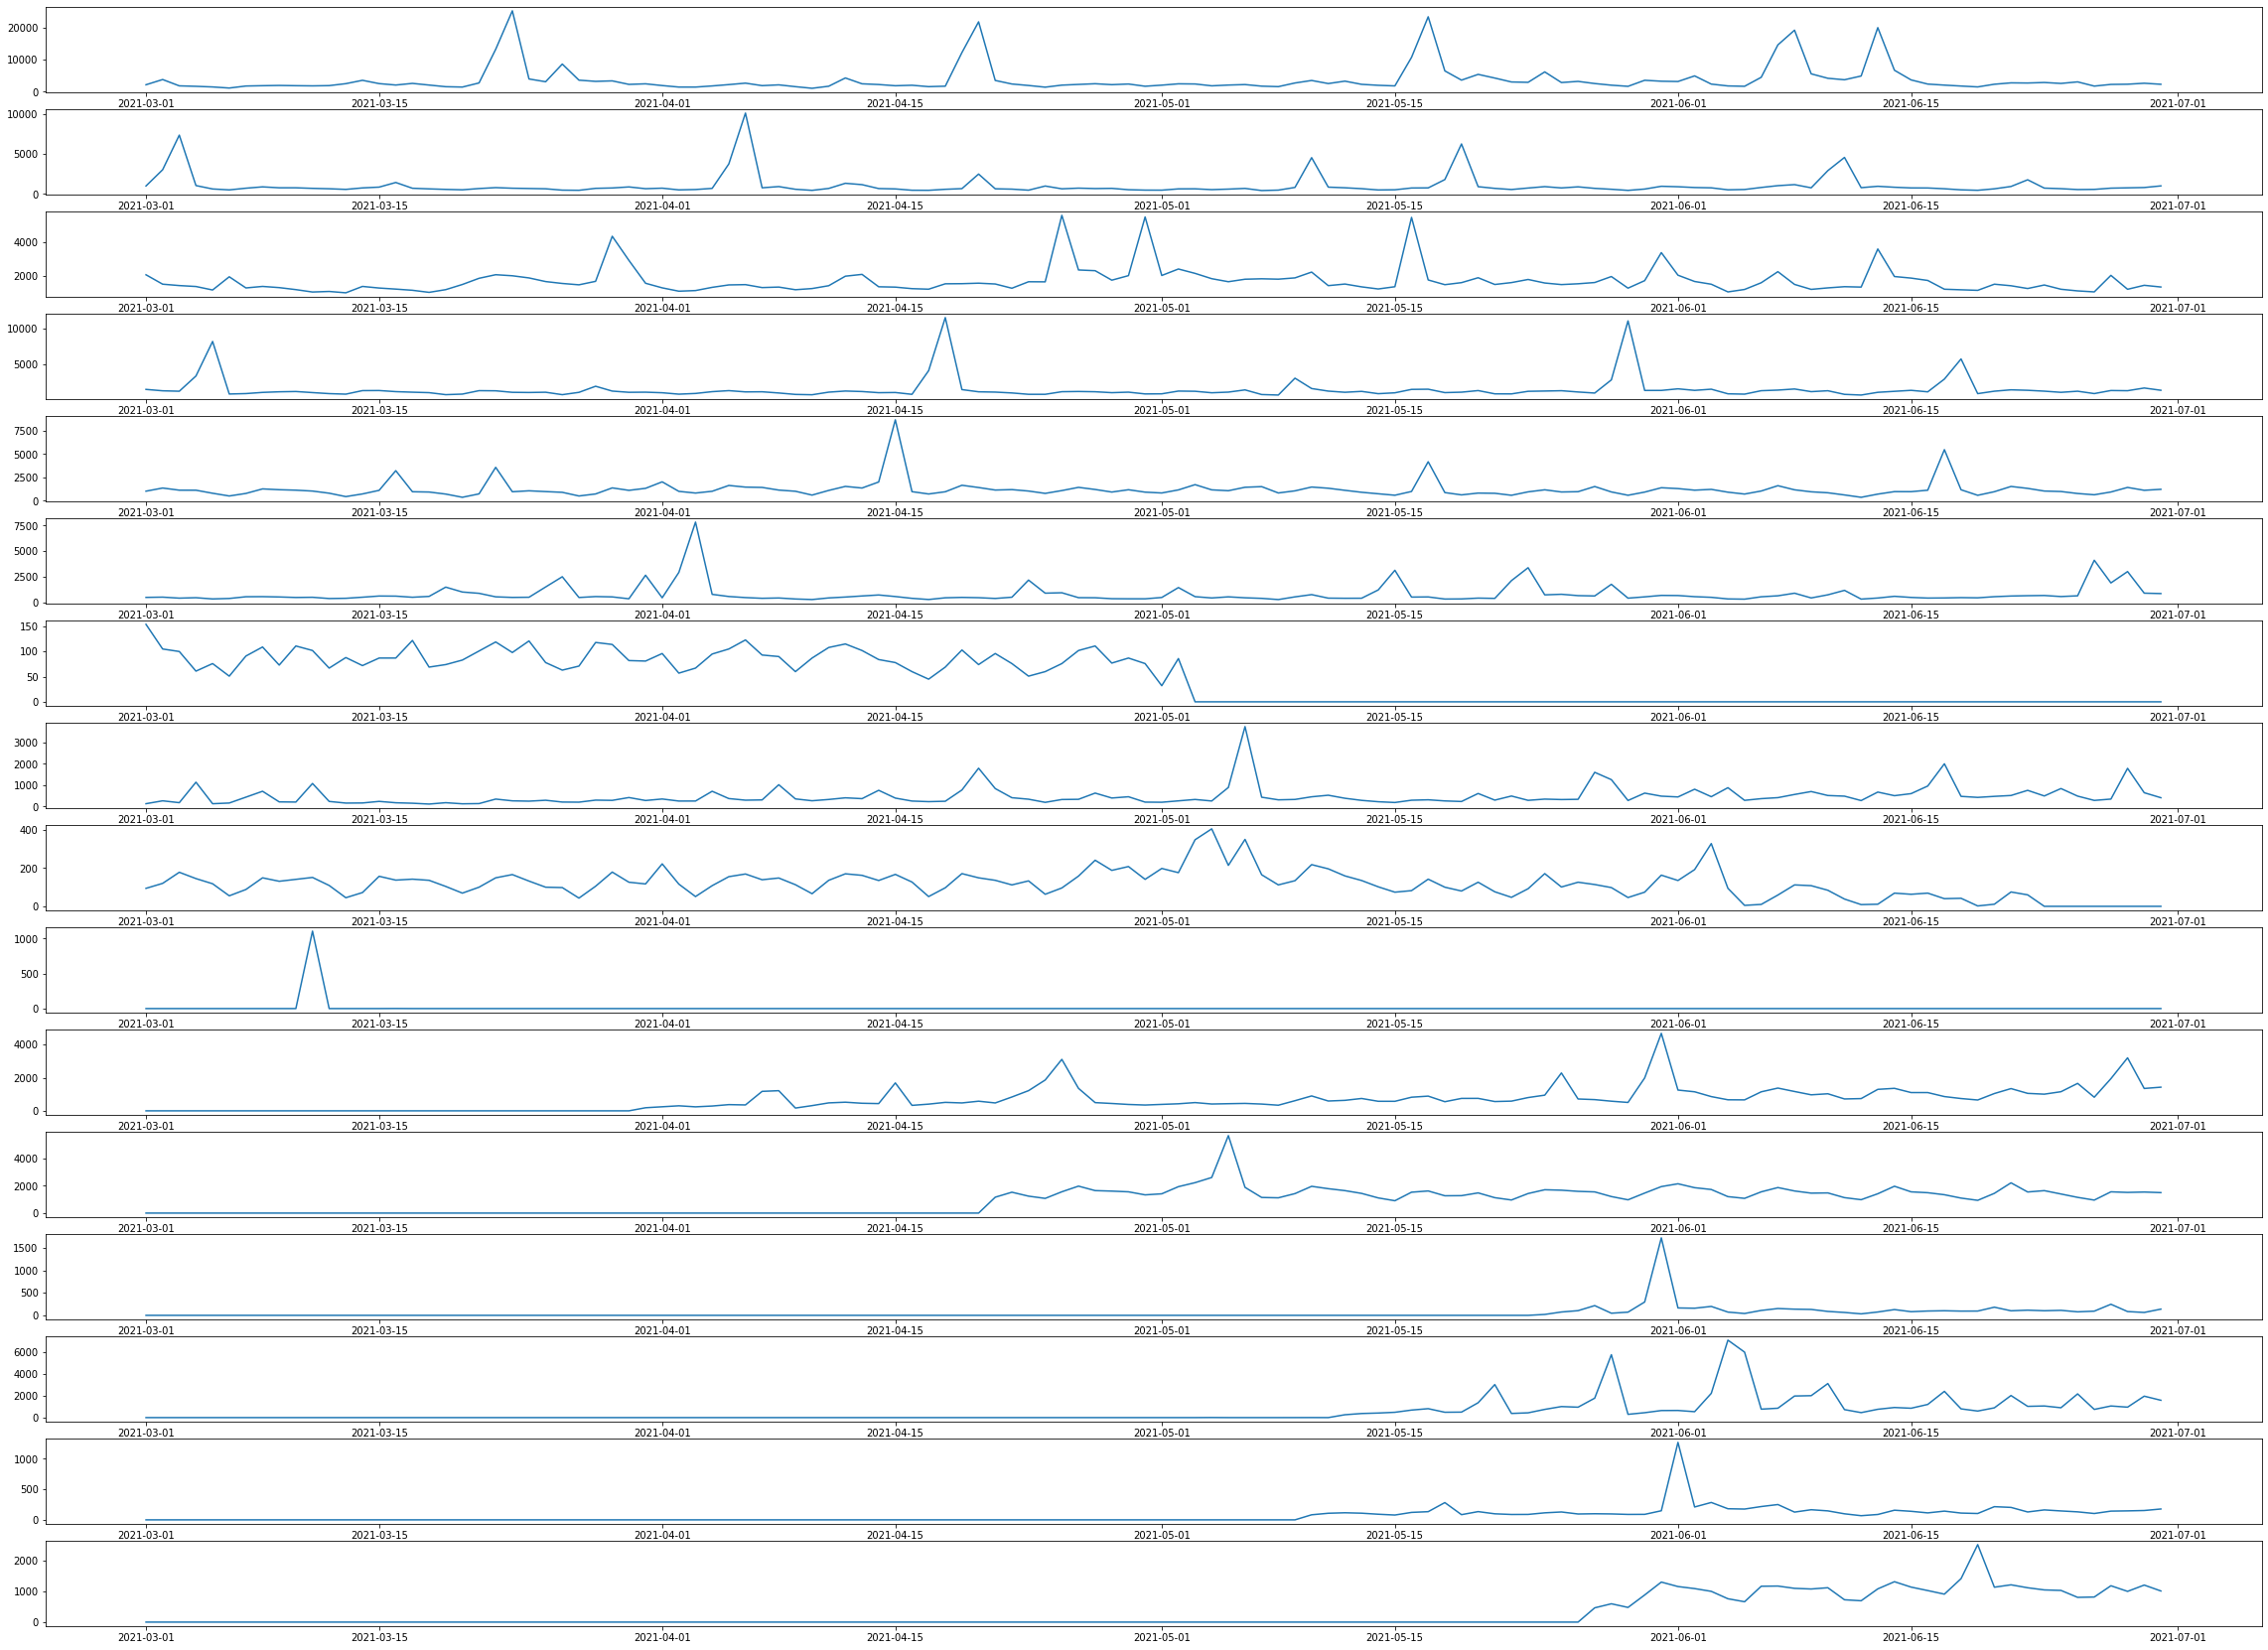

In [56]:
# 일자별 고객사별 주문량

plt.figure(figsize = (40, 30))

x = df['BKG_DATE']
y = df['SH_90001302']
plt.subplot(16,1,1)
plt.plot(x,y)

x = df['BKG_DATE']
y = df['SH_90001441']
plt.subplot(16,1,2)
plt.plot(x,y)

x = df['BKG_DATE']
y = df['SH_90001542']
plt.subplot(16,1,3)
plt.plot(x,y)

x = df['BKG_DATE']
y = df['SH_90001341']
plt.subplot(16,1,4)
plt.plot(x,y)

x = df['BKG_DATE']
y = df['SH_90001541']
plt.subplot(16,1,5)
plt.plot(x,y)

x = df['BKG_DATE']
y = df['SH_90001443']
plt.subplot(16,1,6)
plt.plot(x,y)

x = df['BKG_DATE']
y = df['SH_90001381']
plt.subplot(16,1,7)
plt.plot(x,y)

x = df['BKG_DATE']
y = df['SH_90001521']
plt.subplot(16,1,8)
plt.plot(x,y)

x = df['BKG_DATE']
y = df['SH_90001502']
plt.subplot(16,1,9)
plt.plot(x,y)

x = df['BKG_DATE']
y = df['SH_90001562']
plt.subplot(16,1,10)
plt.plot(x,y)

x = df['BKG_DATE']
y = df['SH_90001582']
plt.subplot(16,1,11)
plt.plot(x,y)

x = df['BKG_DATE']
y = df['SH_90001602']
plt.subplot(16,1,12)
plt.plot(x,y)

x = df['BKG_DATE']
y = df['SH_90001683']
plt.subplot(16,1,13)
plt.plot(x,y)

x = df['BKG_DATE']
y = df['SH_90001622']
plt.subplot(16,1,14)
plt.plot(x,y)

x = df['BKG_DATE']
y = df['SH_90001662']
plt.subplot(16,1,15)
plt.plot(x,y)

x = df['BKG_DATE']
y = df['SH_90001682']
plt.subplot(16,1,16)
plt.plot(x,y)



plt.show()